In [285]:
# # initialize client
# mostly = MostlyAI(
#     api_key='mostly-c10818b618200bcc2f1944ad46d1a62515577ab3aeffee2fccc844c8212fc767', 
#     base_url='https://app.mostly.ai'
# )

# Generate Synthetic Data
1. Generate base data via DataLLM - Mostly AI
2. Basic Statistics/EDA
3. Seperate into customer and policy table
4. Encode/Adding some stats/basics insights

# Config

In [286]:
regenerate_data = False

In [321]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta

# 1. Generate Base Synthetic Data
- Define the scope of the data
- Implement some 

In [288]:
if regenerate_data:
    from datallm import DataLLM

    # Initialize the DataLLM client
    datallm = DataLLM(api_key='zpka_8d441067b6454f098634ede5200b05ec_387761e1', base_url='https://data.mostly.ai')

    # Generate mock data
    mock_data = datallm.mock(
        n=2000,
        data_description="Insurance customer cross-selling data focusing on life policies.",
        columns={
            "Customer ID": {"prompt": "Unique identifier for the customer", "dtype": "integer"},
            "Age": {"prompt": "Age of the customer", "dtype": "integer"},
            "Gender": {"prompt": "Gender of the customer", "dtype": "category", "categories": ["Male", "Female"]},
            "Marital Status": {"prompt": "Marital status of the customer", "dtype": "category", "categories": ["Single", "Married", "Divorced", "Widowed"]},
            "Existing Policy": {"prompt": "Type of existing life insurance policy", "dtype": "category", "categories": ["Term Life", "Critical Illness", "Medical", "Endowment", "Investment", "Whole Life"]},
            "Income": {"prompt": "Annual income of the customer", "dtype": "integer"},
            "Dependents": {"prompt": "Number of dependents", "dtype": "integer"},
            "Health Conditions": {"prompt": "Healthy?", "dtype": "boolean"},
            "Payment Frequency": {"prompt": "Payment frequency for the policy", "dtype": "category", "categories": ["Monthly", "Quarterly", "Annually"]},
            "Payment Method": {"prompt": "Payment Method for the policy", "dtype": "category", "categories": ["Credit", "Cash", "Debit"]},
            "Premium Amount": {"prompt": "Monthly premium amount", "dtype": "integer"},
            "Insured Amount": {"prompt": "Total insured amount", "dtype": "integer"},
            "Recent Payment (Months)": {"prompt": "Months since the last payment", "dtype": "integer"},
            "Recent Purchase (Months)": {"prompt": "Months since the last purchase", "dtype": "integer"},
            "Policy Purchase (Years)": {"prompt": "Years since the policy was purchased", "dtype": "integer"},
            "Customer Tenure (Years)": {"prompt": "Years the customer has been with the company", "dtype": "integer"},
            "Customer On Time Payment": {"prompt": "Is the customer on time with their premium payments", "dtype": "integer"},
            "Smoker": {"prompt": "Is the customer a smoker", "dtype": "integer"},
        },
        progress_bar=True
    )

    mock_data.head()
    mock_data.to_csv('data/L0/most_ai_raw_data.csv', index=False)
else:
    mock_data = pd.read_csv('data/L0/most_ai_raw_data.csv')

# 2. Basic Statistics/EDA
- Exploring the data build, correcting the dataset if required

In [318]:
age_bins = [0, 18, 30, 40, 50, 60, 80]
age_labels = ['0', '18', '30', '40', '50', '60',]

mock_data['AgeGroup'] = pd.cut(mock_data['Age'], bins=age_bins, labels=age_labels, right=False)

## Customer ID

In [311]:
mock_data.groupby('Customer ID')['Income'].nunique().reset_index().head(5)

,Customer ID,Income
0,1,14
1,2,5
2,3,2
3,4,2
4,5,3


In [312]:
mock_data.loc[mock_data['Customer ID']==1].head(5)
# since it is LLM generated, as it lacks overview of the data, perhaps it isn't being consistent with its demography is expected
# Perhaps it will be better if I just reset the customer ID.

,Customer ID,Age,Gender,Marital Status,Existing Policy,Income,Dependents,Payment Frequency,Payment Method,Premium Amount,Insured Amount,Recent Payment (Months),Recent Purchase (Months),Policy Purchase (Years),Customer Tenure (Years),Customer On Time Payment,Smoker,AgeGroup,Payment Frequency_code
7,1,34,Male,Married,Whole Life,105000000,1,Quarterly,Cash,13000,200,1,1,11,11,1,0,30,4
50,1,34,Female,Single,Medical,40,1,Annually,Credit,18,9300000,1,2,4,2,1,1,30,1
359,1,43,Male,Married,Critical Illness,9000000,3,Annually,Credit,1887,20000000,2,2,6,7,1,0,40,1
387,1,52,Male,Divorced,Investment,88000,0,Quarterly,Cash,109,3500000,0,10,3,5,1,0,50,4
388,1,31,Male,Single,Term Life,520000,1,Quarterly,Cash,249,2500000,0,36,1,1,1,0,30,4


In [316]:
mock_data = mock_data.reset_index().drop('Customer ID', axis=1).rename({'index':'Customer ID'}, axis=1)

## Premium Amount
- The default distribution doesnt seems to reflect the change in Age or Policy Type too

<Axes: xlabel='Premium Amount', ylabel='Count'>

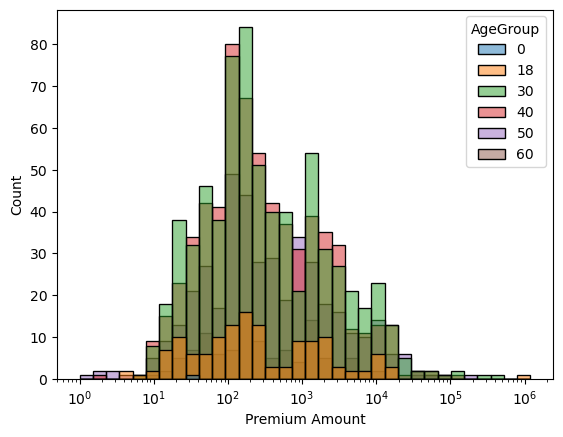

In [319]:
sns.histplot(data=mock_data, x='Premium Amount', log_scale=True, hue ='AgeGroup')

<Axes: xlabel='Premium Amount', ylabel='Count'>

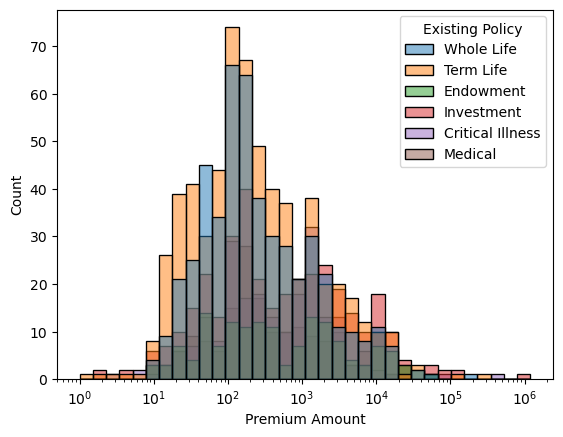

In [317]:
sns.histplot(data=mock_data, x='Premium Amount', log_scale=True, hue ='Existing Policy')
# Premium amount isn't reflect of the different plans types 

In [322]:
help(np.random.normal)

Help on built-in function normal:

normal(...) method of numpy.random.mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    .. note::
        New code should use the `~numpy.random.Generator.normal`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    loc : float or array_like of floats
     

In [ ]:
mock_data.loc[mock_data['Existing Policy']=='Whole Life','Premium'] = int(np.clip(np.random.normal(50000, 15000), 30000, 70000))

<Axes: xlabel='Insured Amount', ylabel='Count'>

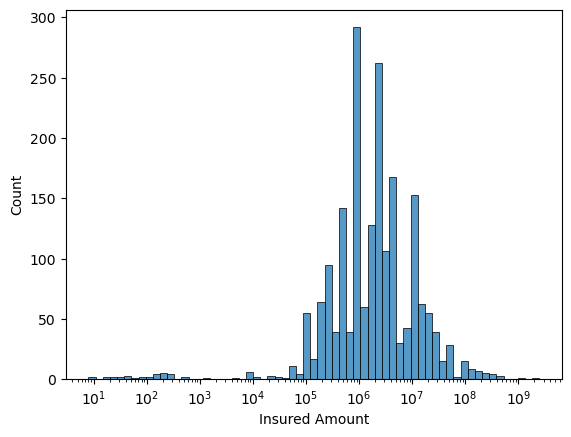

In [290]:
sns.histplot(data=mock_data, x='Insured Amount', log_scale=True)

<Axes: xlabel='Income', ylabel='Count'>

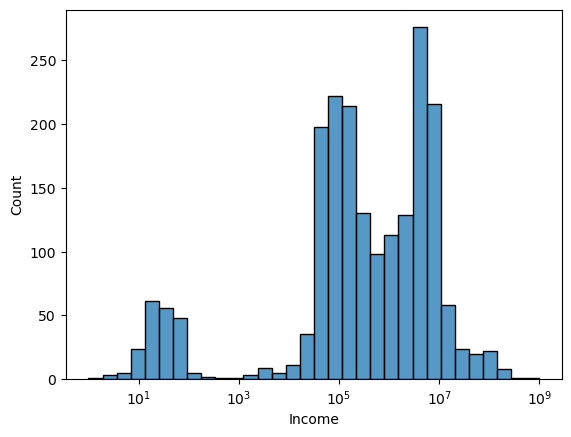

In [291]:
sns.histplot(data=mock_data, x='Income', log_scale=True)

<Axes: xlabel='Income', ylabel='Count'>

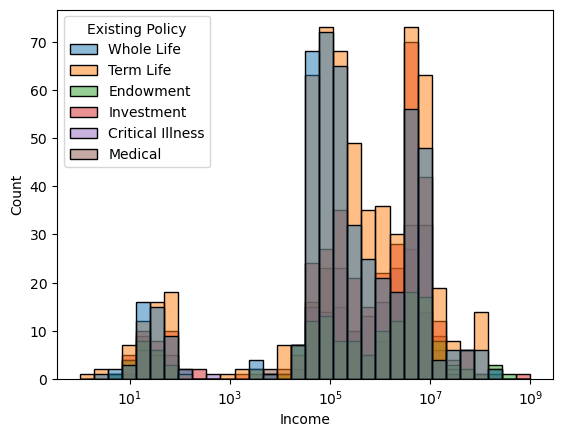

In [295]:
sns.histplot(data=mock_data, x='Income', log_scale=True, hue ='Existing Policy')

<Axes: xlabel='Premium Amount', ylabel='Count'>

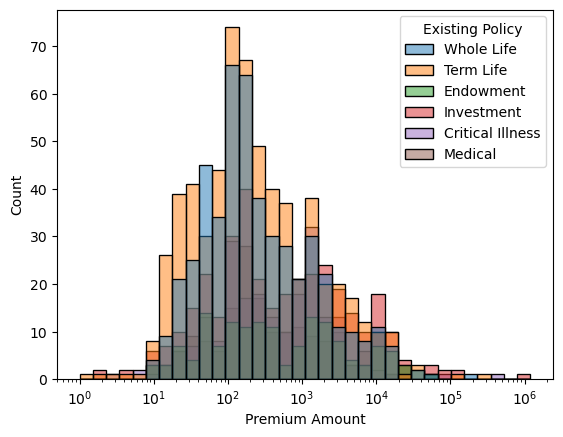

In [269]:
income_bins = [0, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000]
income_labels = ['0','1000', '5000','10000','50000','100000','500000','1000000','5000000']

mock_data['IncomeGroup']  = pd.cut(mock_data['Income'], bins=income_bins, labels=income_labels, right=False)

In [270]:
Payment_Frequency_dict = {'Annually':1,'Quarterly':4,'Monthly':12}
mock_data['Payment Frequency_code'] = mock_data['Payment Frequency'].map(Payment_Frequency_dict)

In [272]:
one_hot_encoded_data = pd.get_dummies(mock_data, columns=['Existing Policy'])

In [273]:
one_hot_encoded_data.groupby('AgeGroup').agg({'Existing Policy_Critical Illness':'sum', 'Existing Policy_Endowment':'sum',
       'Existing Policy_Investment':'sum', 'Existing Policy_Medical':'sum',
       'Existing Policy_Term Life':'sum', 'Existing Policy_Whole Life':'sum'})

/tmp/ipykernel_55688/3598490025.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  one_hot_encoded_data.groupby('AgeGroup').agg({'Existing Policy_Critical Illness':'sum', 'Existing Policy_Endowment':'sum',


,Existing Policy_Critical Illness,Existing Policy_Endowment,Existing Policy_Investment,Existing Policy_Medical,Existing Policy_Term Life,Existing Policy_Whole Life
AgeGroup,,,,,,
0,0,1,0,0,0,0
18,18,6,26,10,47,30
30,54,56,126,65,212,181
40,84,47,108,49,200,152
50,51,31,74,40,122,97
60,9,12,17,13,33,29


In [274]:
one_hot_encoded_data.groupby('IncomeGroup').agg({'Existing Policy_Critical Illness':'sum', 'Existing Policy_Endowment':'sum',
       'Existing Policy_Investment':'sum', 'Existing Policy_Medical':'sum',
       'Existing Policy_Term Life':'sum', 'Existing Policy_Whole Life':'sum'})

/tmp/ipykernel_55688/1796129965.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  one_hot_encoded_data.groupby('IncomeGroup').agg({'Existing Policy_Critical Illness':'sum', 'Existing Policy_Endowment':'sum',


,Existing Policy_Critical Illness,Existing Policy_Endowment,Existing Policy_Investment,Existing Policy_Medical,Existing Policy_Term Life,Existing Policy_Whole Life
IncomeGroup,,,,,,
0,22,22,37,20,57,48
1000,0,2,2,0,5,4
5000,1,0,0,2,2,1
10000,18,15,24,13,55,46
50000,16,14,26,24,77,81
100000,39,21,64,31,136,120
500000,10,7,16,6,37,25
1000000,63,32,100,47,115,71
5000000,37,20,55,19,80,64


In [275]:
one_hot_encoded_data.groupby('Dependents').agg({'Existing Policy_Critical Illness':'sum', 'Existing Policy_Endowment':'sum',
       'Existing Policy_Investment':'sum', 'Existing Policy_Medical':'sum',
       'Existing Policy_Term Life':'sum', 'Existing Policy_Whole Life':'sum'})

,Existing Policy_Critical Illness,Existing Policy_Endowment,Existing Policy_Investment,Existing Policy_Medical,Existing Policy_Term Life,Existing Policy_Whole Life
Dependents,,,,,,
0,45,33,98,45,156,121
1,67,53,115,50,188,172
2,84,52,108,65,199,150
3,13,10,21,13,58,35
4,7,5,7,3,11,10
5,0,0,1,1,2,1
7,0,0,1,0,0,0


In [276]:
one_hot_encoded_data.groupby('Marital Status').agg({'Existing Policy_Critical Illness':'sum', 'Existing Policy_Endowment':'sum',
       'Existing Policy_Investment':'sum', 'Existing Policy_Medical':'sum',
       'Existing Policy_Term Life':'sum', 'Existing Policy_Whole Life':'sum'})

,Existing Policy_Critical Illness,Existing Policy_Endowment,Existing Policy_Investment,Existing Policy_Medical,Existing Policy_Term Life,Existing Policy_Whole Life
Marital Status,,,,,,
Divorced,23,9,23,16,41,27
Married,131,100,214,108,375,314
Single,59,42,110,52,187,137
Widowed,3,2,4,1,11,11


In [277]:
mock_data.groupby('AgeGroup')['Existing Policy'].value_counts()

/tmp/ipykernel_55688/2962374113.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mock_data.groupby('AgeGroup')['Existing Policy'].value_counts()


AgeGroup  Existing Policy 
0         Endowment             1
          Critical Illness      0
          Investment            0
          Medical               0
          Term Life             0
          Whole Life            0
18        Term Life            47
          Whole Life           30
          Investment           26
          Critical Illness     18
          Medical              10
          Endowment             6
30        Term Life           212
          Whole Life          181
          Investment          126
          Medical              65
          Endowment            56
          Critical Illness     54
40        Term Life           200
          Whole Life          152
          Investment          108
          Critical Illness     84
          Medical              49
          Endowment            47
50        Term Life           122
          Whole Life           97
          Investment           74
          Critical Illness     51
          Medical    

In [278]:
mock_data.groupby('AgeGroup').agg({'Smoker':'mean'})

/tmp/ipykernel_55688/964300309.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mock_data.groupby('AgeGroup').agg({'Smoker':'mean'})


,Smoker
AgeGroup,
0,0.000000
18,0.153285
30,0.193084
40,0.245312
50,0.224096
60,0.292035


In [279]:
mock_data['Policy Issue Date'] = [datetime.datetime.now().date() - relativedelta(months=i) for i in mock_data['Recent Purchase (Months)']]

In [280]:
def convert_columns_to_lowercase(df):
    """
    Converts column names in a Pandas DataFrame to lowercase with underscores.
    
    Args:
        df (pd.DataFrame): Input DataFrame.
    
    Returns:
        pd.DataFrame: DataFrame with lowercase column names.
    """
    df.columns = [i.lower().replace(" ","_") for i in df.columns]
    return df


mock_data = convert_columns_to_lowercase(mock_data)

# Seperate into Customer and Policies

In [281]:
mock_data.head(3)

,customer_id,age,gender,marital_status,existing_policy,income,dependents,payment_frequency,payment_method,premium_amount,...,recent_payment_(months),recent_purchase_(months),policy_purchase_(years),customer_tenure_(years),customer_on_time_payment,smoker,agegroup,payment_frequency_code,incomegroup,policy_issue_date
0,814,56,Male,Married,Whole Life,103000,1,Quarterly,Cash,115,...,1,22,22,1,0,1,50,4,100000,2022-09-21
1,14971,53,Male,Single,Whole Life,7740000,2,Monthly,Credit,140,...,10,12,6,3,0,1,50,12,5000000,2023-07-21
2,7510,52,Female,Married,Term Life,6530000,0,Quarterly,Debit,875,...,3,7,6,5,1,0,50,4,5000000,2023-12-21


In [228]:
mock_data.columns

Index(['customer_id', 'age', 'gender', 'marital_status', 'existing_policy',
       'income', 'dependents', 'payment_frequency', 'payment_method',
       'premium_amount', 'insured_amount', 'recent_payment_(months)',
       'recent_purchase_(months)', 'policy_purchase_(years)',
       'customer_tenure_(years)', 'customer_on_time_payment', 'smoker',
       'agegroup', 'payment_frequency_code', 'policy_issue_date'],
      dtype='object')

In [283]:
mock_data[['customer_id','policy_issue_date','existing_policy','policy_issue_date']]


,customer_id,policy_issue_date,existing_policy,policy_issue_date
0,814,2022-09-21,Whole Life,2022-09-21
1,14971,2023-07-21,Whole Life,2023-07-21
2,7510,2023-12-21,Term Life,2023-12-21
3,7422,2024-02-21,Endowment,2024-02-21
4,36,2024-07-21,Term Life,2024-07-21
...,...,...,...,...
1995,488,2024-07-21,Whole Life,2024-07-21
1996,1424,2024-03-21,Term Life,2024-03-21
1997,211,2024-07-21,Term Life,2024-07-21
1998,16456,2024-03-21,Term Life,2024-03-21
